# Project: Investigate a Dataset (No show appointments project):

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This data set presents the no show appointments of a group of patients (100k) in medical appointments in Brazil. The dataset gives lots of data concerning different criteria to be explored and analysed using data analysis techniques in order to find what most probably has an impact resulting in the phenomenon of no show appointments. 

Examples of the criteria to be analysed are the neighborhood of the patients, the gender, age group, whether the patient suffers from hypertension or alcoholism, the dates of the schedueled appointments beside other criteria too. 

Given these data in our data set we can ask the following questions: 

** Which gender mostly make appointments in our clinic? Males or Females?

** Which Age group mostly attends our clinic?

** Do we mostly recieve alcoholic patients? 

** From the criteria provided in this data set does any of them show any correlation with the phenomenon of the no-show appointments?

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df=pd.read_csv('noshowappointments.csv')
df.head()

PatientId  AppointmentID Gender          ScheduledDay  \
0  2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1  5.589980e+14        5642503      M  2016-04-29T16:08:27Z   
2  4.262960e+12        5642549      F  2016-04-29T16:19:04Z   
3  8.679510e+11        5642828      F  2016-04-29T17:29:31Z   
4  8.841190e+12        5642494      F  2016-04-29T16:07:23Z   

         AppointmentDay  Age      Neighbourhood  Scholarship  Hipertension  \
0  2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             0   
2  2016-04-29T00:00:00Z   62      MATA DA PRAIA            0             0   
3  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI            0             0   
4  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             1   

   Diabetes  Alcoholism  Handcap  SMS_received No-show  
0         0           0        0             0      No  
1         0           0        0             0      No  
2         0           0        0             0      No  
3         0           0        0             0      No  
4         1           0        0             0      No

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


As we can see above, the info of our dataframe shows that we don't have any null values thankfully because all the columns show the complete number of entries (110527). 

The column names don't need to be renamed except for the "No-show" column which would preferrable by "No_show", 
"Hipertension" that should be corrected to "Hypertension" and "Handcap" should be corrected to "Handicaped"

The PatientId data type should be changed to a string.

The ScheduledDay and AppointmentDay need to be changed to DateTime data type.

In [3]:
df.duplicated().sum()

0

This means we don't have duplicated entries in our data set thus we don't have to dedupe the dataset. 

In [4]:
df.describe()

PatientId  AppointmentID            Age    Scholarship  \
count  1.105270e+05   1.105270e+05  110527.000000  110527.000000   
mean   1.474963e+14   5.675305e+06      37.088874       0.098266   
std    2.560949e+14   7.129575e+04      23.110205       0.297675   
min    3.920000e+04   5.030230e+06      -1.000000       0.000000   
25%    4.172615e+12   5.640286e+06      18.000000       0.000000   
50%    3.173180e+13   5.680573e+06      37.000000       0.000000   
75%    9.439170e+13   5.725524e+06      55.000000       0.000000   
max    9.999820e+14   5.790484e+06     115.000000       1.000000   

        Hipertension       Diabetes     Alcoholism        Handcap  \
count  110527.000000  110527.000000  110527.000000  110527.000000   
mean        0.197246       0.071865       0.030400       0.022248   
std         0.397921       0.258265       0.171686       0.161543   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       4.000000   

        SMS_received  
count  110527.000000  
mean        0.321026  
std         0.466873  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         1.000000  
max         1.000000

We can see here that most of this summary statistics won't be of use for this data set because most of the data provided here shouldn't be in the form of integers or floats as they should be strings of a "Yes" or "No" values or just unique values as the patient Id.

The only criteria to be observed here is the Age and here we can see that the minimum for Age is -1 which doesn't make any sense and suggests wrong data entry values thus, this column needs further investigation. 


## Data Cleaning 

1- Columns renaming

2- Data types Adjustment

3- Age column investigation

### Columns Renaming:

In [5]:
df.rename(columns={'No-show':'No_show','Hipertension':'Hypertension','Handcap':'Handicaped'}, inplace=True)
df.head()

PatientId  AppointmentID Gender          ScheduledDay  \
0  2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1  5.589980e+14        5642503      M  2016-04-29T16:08:27Z   
2  4.262960e+12        5642549      F  2016-04-29T16:19:04Z   
3  8.679510e+11        5642828      F  2016-04-29T17:29:31Z   
4  8.841190e+12        5642494      F  2016-04-29T16:07:23Z   

         AppointmentDay  Age      Neighbourhood  Scholarship  Hypertension  \
0  2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             0   
2  2016-04-29T00:00:00Z   62      MATA DA PRAIA            0             0   
3  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI            0             0   
4  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             1   

   Diabetes  Alcoholism  Handicaped  SMS_received No_show  
0         0           0           0             0      No  
1         0           0           0             0      No  
2         0           0           0             0      No  
3         0           0           0             0      No  
4         1           0           0             0      No

As seen here, the column names have been adjusted as needed.

### Data types Adjustment:

In [6]:
df['PatientId'] =str(df['PatientId'])
df['ScheduledDay']= pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay']= pd.to_datetime(df['AppointmentDay']) 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  object             
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hypertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handicaped      110527 non-null  int64              
 12  SMS_received    110527 non-null  int64              
 13  No_show       

Now, all the data types we needed to change to perform further analysis are ready to use.

### Age column investigation:

In [8]:
df['Age'].min()
wrong_row= df.query('Age == Age.min()')
wrong_row

PatientId  AppointmentID  \
99832  0         2.987250e+13\n1         5.589980e+14...        5775010   

      Gender              ScheduledDay            AppointmentDay  Age  \
99832      F 2016-06-06 08:58:13+00:00 2016-06-06 00:00:00+00:00   -1   

      Neighbourhood  Scholarship  Hypertension  Diabetes  Alcoholism  \
99832         ROMÃO            0             0         0           0   

       Handicaped  SMS_received No_show  
99832           0             0      No

In [9]:
df.drop(99832, axis=0,inplace=True)

In [10]:
df['Age'].min()

0

In [11]:
wrong_rows= df.query('Age == Age.min()')
wrong_rows

PatientId  AppointmentID  \
59      0         2.987250e+13\n1         5.589980e+14...        5638545   
63      0         2.987250e+13\n1         5.589980e+14...        5628286   
64      0         2.987250e+13\n1         5.589980e+14...        5616082   
65      0         2.987250e+13\n1         5.589980e+14...        5628321   
67      0         2.987250e+13\n1         5.589980e+14...        5639264   
...                                                   ...            ...   
110345  0         2.987250e+13\n1         5.589980e+14...        5702537   
110346  0         2.987250e+13\n1         5.589980e+14...        5777724   
110454  0         2.987250e+13\n1         5.589980e+14...        5772400   
110460  0         2.987250e+13\n1         5.589980e+14...        5769545   
110507  0         2.987250e+13\n1         5.589980e+14...        5786918   

       Gender              ScheduledDay            AppointmentDay  Age  \
59          F 2016-04-29 08:08:43+00:00 2016-04-29 00:00:00+00:00    0   
63          M 2016-04-27 10:46:12+00:00 2016-04-29 00:00:00+00:00    0   
64          M 2016-04-25 13:28:21+00:00 2016-04-29 00:00:00+00:00    0   
65          M 2016-04-27 10:48:50+00:00 2016-04-29 00:00:00+00:00    0   
67          F 2016-04-29 08:53:02+00:00 2016-04-29 00:00:00+00:00    0   
...       ...                       ...                       ...  ...   
110345      F 2016-05-16 12:30:58+00:00 2016-06-01 00:00:00+00:00    0   
110346      M 2016-06-06 14:22:34+00:00 2016-06-08 00:00:00+00:00    0   
110454      F 2016-06-03 15:18:44+00:00 2016-06-03 00:00:00+00:00    0   
110460      F 2016-06-03 08:56:51+00:00 2016-06-03 00:00:00+00:00    0   
110507      F 2016-06-08 09:04:18+00:00 2016-06-08 00:00:00+00:00    0   

            Neighbourhood  Scholarship  Hypertension  Diabetes  Alcoholism  \
59              CONQUISTA            0             0         0           0   
63           SÃO BENEDITO            0             0         0           0   
64      ILHA DAS CAIEIRAS            0             0         0           0   
65              CONQUISTA            0             0         0           0   
67         NOVA PALESTINA            0             0         0           0   
...                   ...          ...           ...       ...         ...   
110345        RESISTÊNCIA            0             0         0           0   
110346        RESISTÊNCIA            0             0         0           0   
110454        RESISTÊNCIA            0             0         0           0   
110460        RESISTÊNCIA            0             0         0           0   
110507        MARIA ORTIZ            0             0         0           0   

        Handicaped  SMS_received No_show  
59               0             0      No  
63               0             0      No  
64               0             1      No  
65               0             0      No  
67               0             0      No  
...            ...           ...     ...  
110345           0             0      No  
110346           0             0      No  
110454           0             0      No  
110460           0             0      No  
110507           0             0      No  

[3539 rows x 14 columns]

As seen after investigating the Age column, there was 1 row with a negative value so we dropped it, then after investigating our new age minimum value to be found as 0, It was also found in 3539 rows which can't be simply deleted from our data set because they make a good ratio of the whole data set, in addition to the fact that the 0 Age here may mean children below one year of age so it can still be meaningful.

In [12]:
df.to_csv('clean_part1_project2.csv', index=False)

## Exploratory Data Analysis

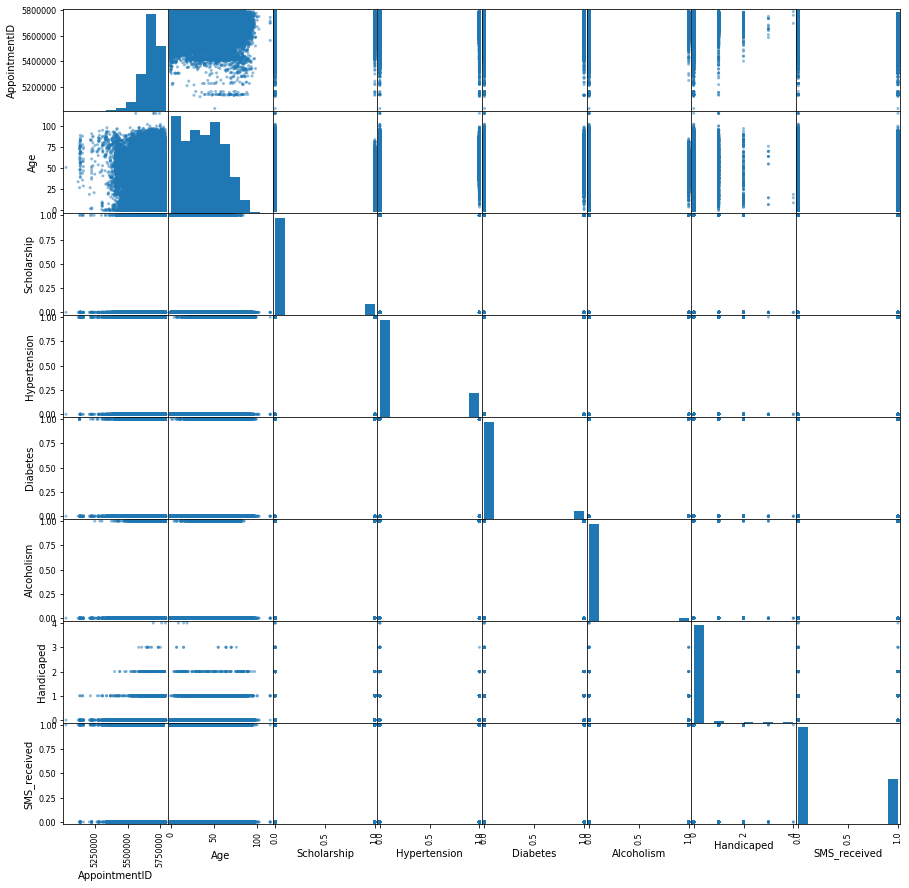

In [13]:
pd.plotting.scatter_matrix(df, figsize=(15,15));

First of all, I like to take a look at all the visual relations possible between all my criteria through this scatter matrix to see if I can spot any relations or significant facts visually using the matrix. 
An interesting note here is that all scatter matrices appear to show no correlations - either positive or negative -.

### Research Question 1 (Which gender mostly make appointments in our clinic? Males or Females?):

In [14]:
Genders =  df['Gender'].value_counts()

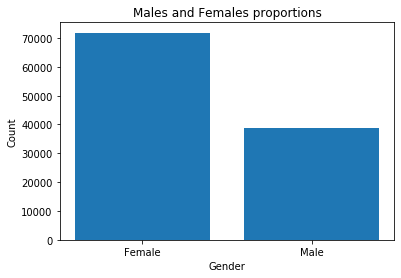

In [15]:
plt.bar([1, 2], Genders, tick_label=['Female', 'Male']);
plt.title('Males and Females proportions');
plt.xlabel('Gender');
plt.ylabel('Count');

As shown above, females appear to be attending our clinics much more than males (almost double the males count), thus during further investigation it would be very helpful to focus on interviewing or making surveys - in order to solve the no-shows issue- that specially target female patients.

### Research Question 2 (Which Age group mostly attends our clinic?):

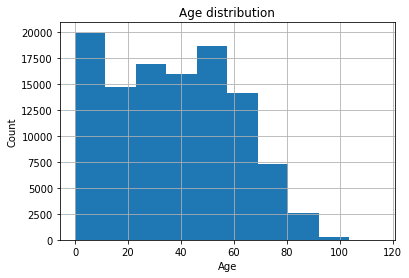

In [21]:
df['Age'].hist();
plt.title('Age distribution');
plt.xlabel('Age');
plt.ylabel('Count');

By taking a closer look at the histogram of the age groups attending medical appointments, it can be seen that the distribution is right skewed, where most of the ages are 60 years or below. 

In [17]:
df['Age'].describe()

count    110526.000000
mean         37.089219
std          23.110026
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

More information can be found from the description of the Age column which shows the following:

** 25% of the patients are 18 years old or younger.

** 50% of our patients are 37 years old or younger.

** 75% of our patients are 55 years old or younger.

** The maximum age is 115 years old or younger.

** The minimum age is 0 (meaning children that are less than 1 year of age), and we suggest here finding another way of documenting this age groups accurate ages (for example: in months) for more precise and accurate future data analysis.

### Research Question 3 & 4:
### (Do we mostly recieve alcoholic patients?): 
### (From the criteria provided in this data set does any of them show any correlation with the phenomenon of the no-show appointments?):

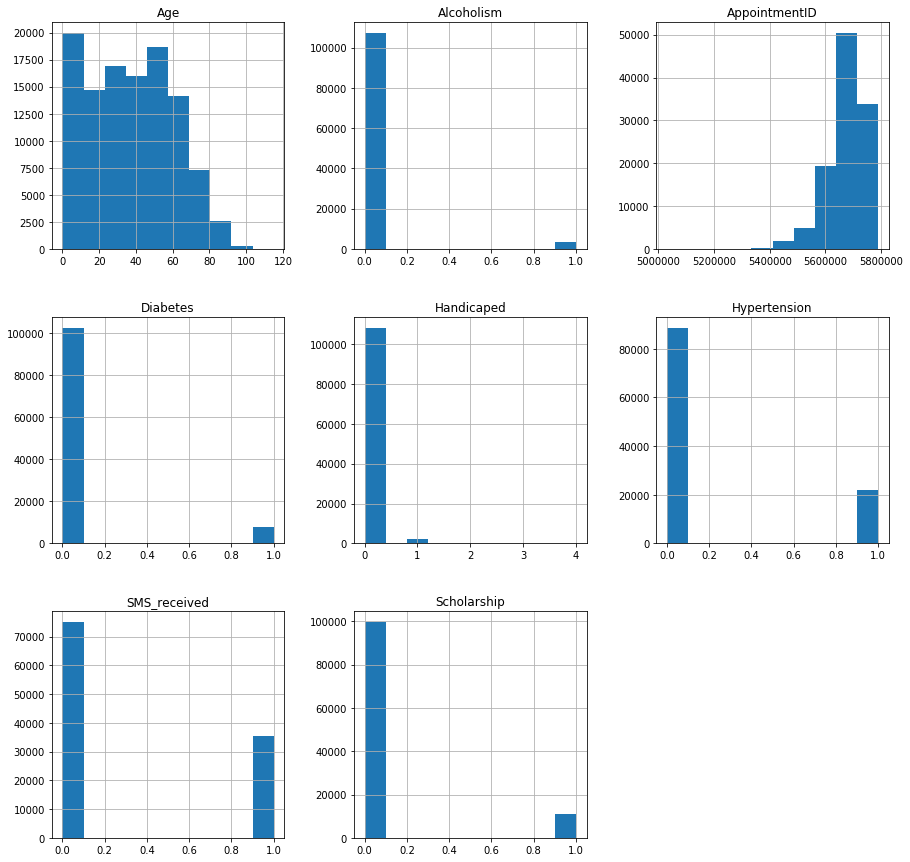

In [18]:
df.hist(figsize=(15, 15));

From the above bar charts we can conclude some information which are: 

** Our clinics recieve mostly Non-Alcoholic patients.

** Our clinics recieve mostly Non-Diabetic patients. 

** Our clinics recieve mostly Healthy(Not Handicaped) patients.

** Our clinics recieve mostly Non-Hypertensive patients.

** Most patients didn't enroll in the scholarship programs of Brazil.

Concerning if there is any correlation between the phenomenon of no-shows and any of the criteria provided in our data set, 
There appears to be NO relation between any of the criteria provided and the phenomenon under study (as seen from the scatter matrix first and the other visuals provided). 

This suggests that further investigation concerning the issue needs to be performed. 

In [19]:
No_shows = df['No_show'].value_counts()

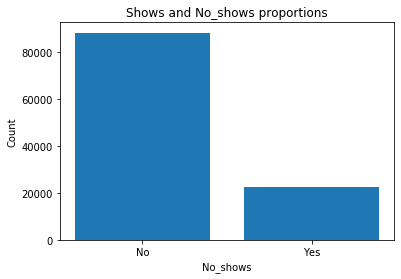

In [20]:
plt.bar([1, 2], No_shows, tick_label=['No', 'Yes']);
plt.title('Shows and No_shows proportions');
plt.xlabel('No_shows');
plt.ylabel('Count');

The no-shows as shown in the bar chart above appears to constitute around 18% - 20% of the total shows and non-shows(110527 values) which needs further investigation. 

## Conclusions (and further notes):

### Conclusions Summary:

** Females appear to be attending our clinics much more than males (almost double the males count).

** Most of the patients are aged 60 years old or less.

** 25% of the patients are 18 years old or younger.

** 50% of our patients are 37 years old or younger.

** 75% of our patients are 55 years old or younger.

** The maximum age is 115 years old or younger.

** The minimum age is 0 (meaning children that are less than 1 year of age), and we suggest here finding another way of documenting this age groups accurate ages (for example: in months) for more precise and accurate future data analysis.

** Our clinics recieve mostly Non-Alcoholic patients.

** Our clinics recieve mostly Non-Diabetic patients. 

** Our clinics recieve mostly Healthy(Not Handicaped) patients.

** Our clinics recieve mostly Non-Hypertensive patients.

** Most patients didn't enroll in the scholarship programs of Brazil.

** The no-shows as shown in the bar chart above appears to constitute around 18% - 20% of the total appointments.

** There appears to be NO relation between any of the criteria provided and the phenomenon under study (as seen from the scatter matrix first and the other visuals provided).

### Limitations of this study:

** The data provided in this data set is not sufficient , thus I think further factors need to be investigated (such as the socio-economic status of the patients, whether the patients who don't show up have partners or families to accompany them for the appointments and the availability of transportation)

** There are 3539 patients recorded with the age 0 and we don't have enough information whether this is because they are less than one year of age or because these are misrecordings (like the droppped row recording a -1 years old patient), thus further deep investigation in this issue is needed and another way of recording the Age is needed. 



### Notes and Questions: 

Using the following code: "pd.plotting.scatter_matrix(df, figsize=(15,15));" took alot of time during execution which shouldn't be happening with pandas library as we studied in the curriculum so kindly explain why this happened. 

I think it may be because in this project we are working with a data set that has more than 100k values unlike during working in the Udacity classroom, but I need to confirm if that is the real reason why it slows down that much.

I have also had a problem with running code that have the following format "df.plot()", They keep running for a very very long time and I get no output in the end, Is it because of using a huge data set?! That was why I searched for other codes to give me the same outputs I need but with faster execution times where I found the format "plt.scatter()" for example in the matplotlib library. 

Would it be advisable if I divide one project into multiple files (for example, one for the clean data as I did here and another one for visualizations) or would it be better practice if I put the whole project in one file for all the data analysis process to be found in one place and easly traceable?
That is why I saved the file before exploratory analysis, in order to perform all the needed analysis in my own draft(another file) where I found out about the slow executing codes. 

